In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [7]:
wiki.invoke('What is machine learning?')

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [9]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ['TAVILTY_API_KEY']=os.getenv('TAVILY_API_KEY')
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')


In [10]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily=TavilySearchResults()

/tmp/ipykernel_76229/3543858584.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [11]:
tavily.invoke("Current AI news")

[{'title': 'AI News September 6 2025, The Pulse And The Pattern',
  'url': 'https://binaryverseai.com/ai-news-september-6-2025/',
  'content': '← Back to all AI News\n\n### 1) What new ChatGPT features did OpenAI ship this week?\n\nOpenAI added Branch in new chat on the web so you can fork any message into a separate conversation that inherits context. It also opened Projects to the Free tier with file limits by plan, and it expanded Codex across IDEs, the CLI, GitHub, and the iOS app with single sign in via your ChatGPT account. [...] Here’s your map of the terrain in AI news September 6 2025. Twenty three stories. Each one sharp, compact, and anchored in how the change shows up in real life. Read on, then pass it to the one teammate who still believes they can catch up tomorrow.\n\n## Table of Contents\n\n## 1. OpenAI, Branch Chats, Projects For All, Codex Everywhere [...] ## 15. Broadcom Pops On A 10B Mystery AI Order\n\nBroadcom’s quarter beat on revenue and earnings, then a new 10

In [12]:
tools=[arxiv,wiki,tavily]

In [18]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='gemma2-9b-it')
llm_with_tools=llm.bind_tools(tools)

In [19]:
from langchain_core.messages import HumanMessage,AIMessage

In [21]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI news")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': 'xksgppkdk',
  'type': 'tool_call'}]

In [23]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode, tools_condition
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages,AnyMessage
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

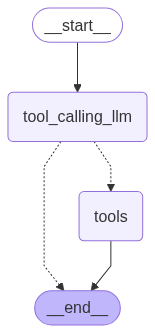

In [24]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)

builder.add_edge("tools",END)



graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
from pprint import pprint

In [29]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (am6fm3n80)
 Call ID: am6fm3n80
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [30]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top5 ai news for sep 8th 25")})
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Provide me the top5 ai news for sep 8th 25
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (7hdd774ac)
 Call ID: 7hdd774ac
  Args:
    query: top 5 ai news for september 8th 2023
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Top AI News, September 2023 - Everypixel Journal", "url": "https://journal.everypixel.com/top-ai-news-september-2023", "content": "Image 1: Top AI News, September 2023 Image 2: Top AI News, September 2023 **Meta AI:**An advanced conversational assistant available within personal chats on WhatsApp, Messenger, and Instagram.Meta AIhas access to real-time information and offers a tool for image generation. Image 3: Top AI News, September 2023 Image 4: Top AI News, September 2023 Image 5: Top AI News, September 2023 Image 6: Top AI News

In [31]:
messages=graph.invoke({"messages":HumanMessage(content="Who is kr$na")})
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Who is kr$na
================================== Ai Message ==================================
Tool Calls:
  wikipedia (cqhp9y8fr)
 Call ID: cqhp9y8fr
  Args:
    query: kr$na
================================= Tool Message =================================
Name: wikipedia

Page: KRSNA (rapper)
Summary: Krishna Kaul, known mononymously as Krishna, stylised now as KR$NA, (previously as Krsna; known formerly as YoungProzpekt) is an Indian rapper. He was one of the earliest rappers to emerge in the Indian hip hop scene in the mid-2000s under the stage name Prozpekt. He is widely acknowledged within the Desi hip-hop community for pioneering a lyrical revolution in the genre, infusing a new wave of poetic depth and lyrical complexity into hip-hop's narrative. He was als
